In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
!pip install anndata
!pip install scanpy
!pip install -U matplotlib

In [2]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
import matplotlib.lines as mlines

In [6]:
dat_h5ad = anndata.read("/content/drive/MyDrive/Colab_Notebooks/Astro98Final/t_cells_from_paper.h5ad")

In [7]:
dat_h5ad

AnnData object with n_obs × n_vars = 76575 × 4000
    obs: 'donor', 'method', 'donor_method', 'cell_ontology_type', 'cell_ontology_id', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'cell_types'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'hvg', 'neighbors', 'umap'
    obsm: 'X_umap', 'scvi'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
dat_h5ad.obs

donor method donor_method  \
FCAImmP7277556-CTCATTAGTGATGTGG           F29   3GEX     F29_3GEX   
TTA7-GTCCTCAGTCAGAATA                      P1   3GEX      P1_3GEX   
Human_colon_16S7985396-CAACTAGTCGCATGAT   F74   5GEX     F74_5GEX   
WSSS8084742-TACGGTAGTGTGGTCC              C40   3GEX     C40_3GEX   
WSSS8084745-CTGCCTATCAGGACAG              C41   3GEX     C41_3GEX   
...                                       ...    ...          ...   
FCAImmP7528294-AAGGAGCGTTGGGACA           F38   5GEX     F38_5GEX   
FCAImmP7528283-CACAGGCAGGTTACCT           F38   3GEX     F38_3GEX   
T06_TH_TOT_5GEX_2_S10-ATCCACCTCCGGGTGT    T06   5GEX     T06_5GEX   
WSSS8084742-TTACCATGTTAGGACG              C40   3GEX     C40_3GEX   
FCAImmP7579230-CGACCTTGTGCTCTTC           F45   5GEX     F45_5GEX   

                                                                        cell_ontology_type  \
FCAImmP7277556-CTCATTAGTGATGTGG                                 CD4-positive helper T cell   
TTA7-GTCCTCAGTCAGAATA                                double-positive, alpha-beta thymocyte   
Human_colon_16S7985396-CAACTAGTCGCATGAT  CD8-alpha-alpha-positive, alpha-beta intraepit...   
WSSS8084742-TACGGTAGTGTGGTCC                                            gamma-delta T cell   
WSSS8084745-CTGCCTATCAGGACAG                                     double negative thymocyte   
...                                                                                    ...   
FCAImmP7528294-AAGGAGCGTTGGGACA                                          alpha-beta T cell   
FCAImmP7528283-CACAGGCAGGTTACCT                                          alpha-beta T cell   
T06_TH_TOT_5GEX_2_S10-ATCCACCTCCGGGTGT                                   regulatory T cell   
WSSS8084742-TTACCATGTTAGGACG                                     double negative thymocyte   
FCAImmP7579230-CGACCTTGTGCTCTTC                      double-positive, alpha-beta thymocyte   

                                        cell_ontology_id  _scvi_batch  \
FCAImmP7277556-CTCATTAGTGATGTGG               CL:0000492            9   
TTA7-GTCCTCAGTCAGAATA                         CL:0000809           23   
Human_colon_16S7985396-CAACTAGTCGCATGAT       CL:0000915           21   
WSSS8084742-TACGGTAGTGTGGTCC                  CL:0000798            4   
WSSS8084745-CTGCCTATCAGGACAG                  CL:0002489            5   
...                                                  ...          ...   
FCAImmP7528294-AAGGAGCGTTGGGACA               CL:0000789           14   
FCAImmP7528283-CACAGGCAGGTTACCT               CL:0000789           13   
T06_TH_TOT_5GEX_2_S10-ATCCACCTCCGGGTGT        CL:0000815           27   
WSSS8084742-TTACCATGTTAGGACG                  CL:0002489            4   
FCAImmP7579230-CGACCTTGTGCTCTTC               CL:0000809           18   

                                         _scvi_labels  _scvi_local_l_mean  \
FCAImmP7277556-CTCATTAGTGATGTGG                     0            7.530522   
TTA7-GTCCTCAGTCAGAATA                               0            7.459976   
Human_colon_16S7985396-CAACTAGTCGCATGAT             0            8.154449   
WSSS8084742-TACGGTAGTGTGGTCC                        0            8.311922   
WSSS8084745-CTGCCTATCAGGACAG                        0            8.458637   
...                                               ...                 ...   
FCAImmP7528294-AAGGAGCGTTGGGACA                     0            8.241430   
FCAImmP7528283-CACAGGCAGGTTACCT                     0            8.004965   
T06_TH_TOT_5GEX_2_S10-ATCCACCTCCGGGTGT              0            7.444843   
WSSS8084742-TTACCATGTTAGGACG                        0            8.311922   
FCAImmP7579230-CGACCTTGTGCTCTTC                     0            8.367014   

                                         _scvi_local_l_var  cell_types  
FCAImmP7277556-CTCATTAGTGATGTGG                   0.342190       CD4+T  
TTA7-GTCCTCAGTCAGAATA                             0.219234       DP(P)  
Human_colon_16S7985396-CAACTAGTCGCATGAT           0.698212   

In [9]:
dat_h5ad.obs['cell_types']

FCAImmP7277556-CTCATTAGTGATGTGG                 CD4+T
TTA7-GTCCTCAGTCAGAATA                           DP(P)
Human_colon_16S7985396-CAACTAGTCGCATGAT     CD8αα(II)
WSSS8084742-TACGGTAGTGTGGTCC                      γδT
WSSS8084745-CTGCCTATCAGGACAG                    DN(P)
                                              ...    
FCAImmP7528294-AAGGAGCGTTGGGACA            αβT(entry)
FCAImmP7528283-CACAGGCAGGTTACCT            αβT(entry)
T06_TH_TOT_5GEX_2_S10-ATCCACCTCCGGGTGT     Treg(diff)
WSSS8084742-TTACCATGTTAGGACG                    DN(P)
FCAImmP7579230-CGACCTTGTGCTCTTC                 DP(Q)
Name: cell_types, Length: 76575, dtype: category
Categories (15, object): ['CD4+T', 'CD8+T', 'CD8αα(I)', 'CD8αα(II)', ..., 'Treg', 'Treg(diff)',
                          'αβT(entry)', 'γδT']

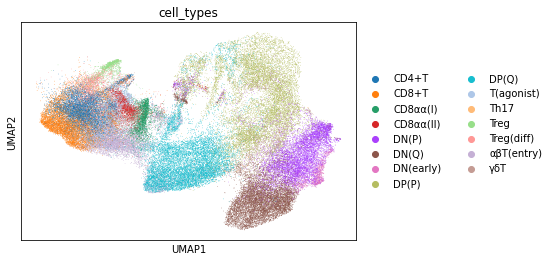

In [10]:
sc.pl.umap(dat_h5ad, color='cell_types')

In [21]:
DN_early = dat_h5ad[dat_h5ad.obs['cell_types'] == 'DN(early)']
DN_P_Q = dat_h5ad[(dat_h5ad.obs['cell_types'] == 'DN(P)') | (dat_h5ad.obs['cell_types'] == 'DN(Q)')]
DP_P_Q = dat_h5ad[(dat_h5ad.obs['cell_types'] == 'DP(P)') | (dat_h5ad.obs['cell_types'] == 'DP(Q)')]
abT = dat_h5ad[dat_h5ad.obs['cell_types'] == 'αβT(entry)']
ydT = dat_h5ad[dat_h5ad.obs['cell_types'] == 'γδT']
CD8aa1 = dat_h5ad[dat_h5ad.obs['cell_types'] == 'CD8αα(I)']
CD8aa2 = dat_h5ad[dat_h5ad.obs['cell_types'] == 'CD8αα(II)']
CD4 = dat_h5ad[dat_h5ad.obs['cell_types'] == 'CD4+T']
CD8 = dat_h5ad[dat_h5ad.obs['cell_types'] == 'CD8+T']
Treg = dat_h5ad[dat_h5ad.obs['cell_types'] == 'Treg']
Treg_diff = dat_h5ad[dat_h5ad.obs['cell_types'] == 'Treg(diff)']
T = dat_h5ad[dat_h5ad.obs['cell_types'] == 'T(agonist)']
Th17 = dat_h5ad[dat_h5ad.obs['cell_types'] == 'Th17']
T_all = dat_h5ad[(dat_h5ad.obs['cell_types'] == 'Treg') | 
                 (dat_h5ad.obs['cell_types'] == 'Treg(diff)') | 
                 (dat_h5ad.obs['cell_types'] == 'T(agonist)') | 
                 (dat_h5ad.obs['cell_types'] == 'Th17')]

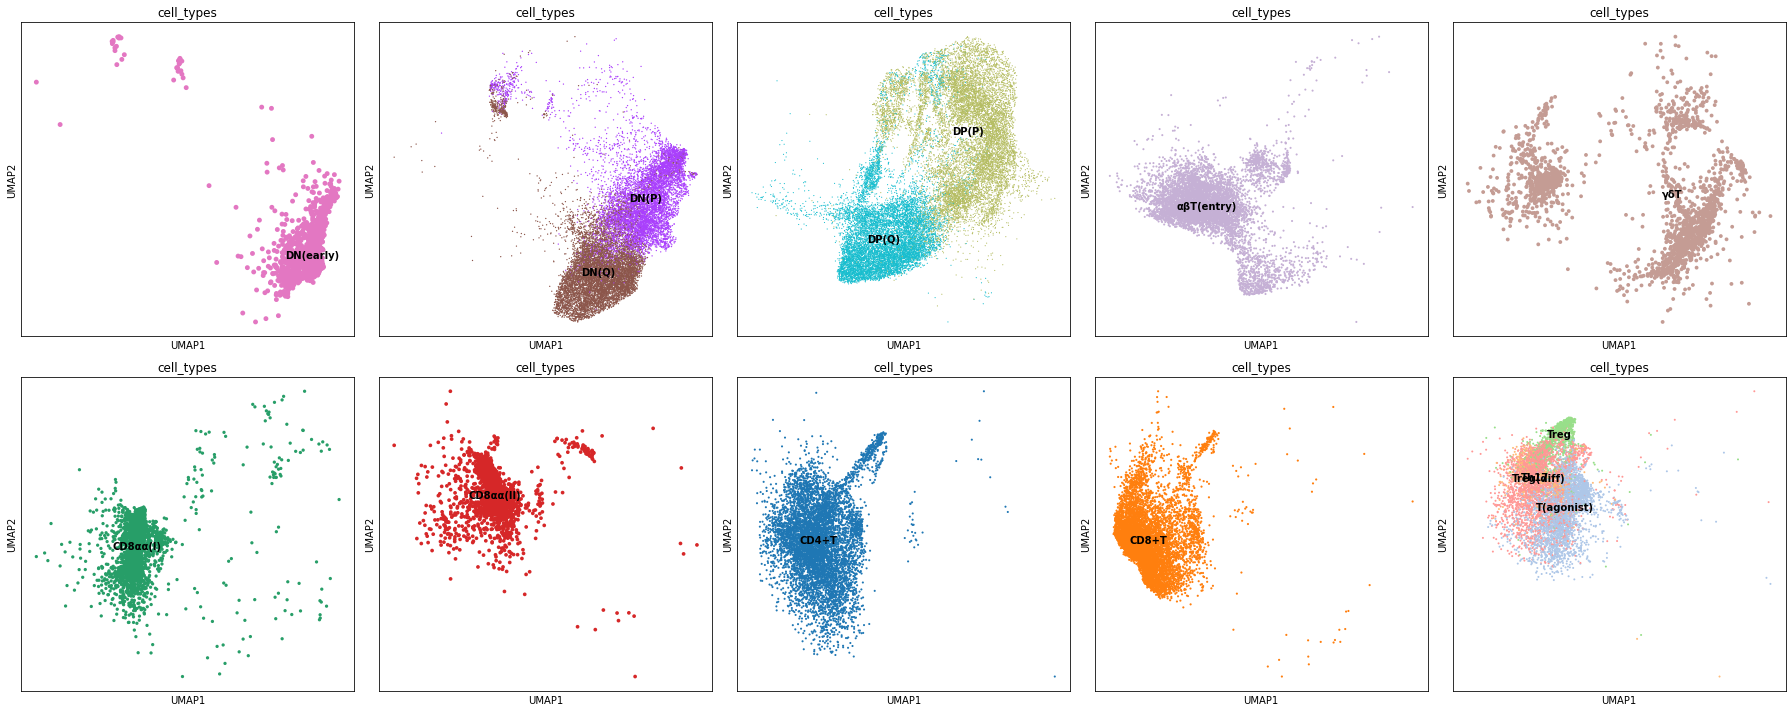

In [37]:
fig, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5, figsize=(25,10))

ax1_dict = sc.pl.umap(DN_early, color='cell_types', ax=ax1, show=False, legend_loc='on data')
ax2_dict = sc.pl.umap(DN_P_Q, color='cell_types', ax=ax2, show=False, legend_loc='on data')
ax3_dict = sc.pl.umap(DP_P_Q,color='cell_types', ax=ax3, show=False, legend_loc='on data')
ax4_dict = sc.pl.umap(abT,color='cell_types', ax=ax4, show=False, legend_loc='on data')
ax5_dict = sc.pl.umap(ydT,color='cell_types', ax=ax5, show=False, legend_loc='on data')
ax6_dict = sc.pl.umap(CD8aa1,color='cell_types', ax=ax6, show=False, legend_loc='on data')
ax7_dict = sc.pl.umap(CD8aa2,color='cell_types', ax=ax7, show=False, legend_loc='on data')
ax8_dict = sc.pl.umap(CD4,color='cell_types', ax=ax8, show=False, legend_loc='on data')
ax9_dict = sc.pl.umap(CD8,color='cell_types', ax=ax9, show=False, legend_loc='on data')
ax10_dict = sc.pl.umap(T_all, color='cell_types', ax=ax10, show=False, legend_loc='on data')

fig.tight_layout()


/usr/local/lib/python3.7/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<Figure size 1200x800 with 0 Axes>

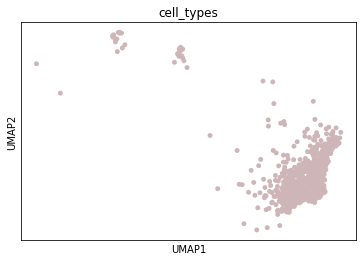

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [38]:
## Initilize writer 
metadata = dict(title='2D animation', artist='Matplotlib')
writer = FFMpegWriter(fps=0.65, metadata=metadata, bitrate=200000)
f = plt.figure(dpi=200)

## SAVE AS MP4 ##
f, ax = plt.subplots(1,1)
cell_types_list = [['DN(early)'], ['DN(P)', 'DN(Q)'], ['DP(P)', 'DP(Q)'], ['αβT(entry)'], ['γδT'], 
                   ['CD8αα(I)'], ['CD8αα(II)'], ['CD4+T'], ['CD8+T'], 
                   ['Treg', 'Treg(diff)', 'T(agonist)', 'Th17']]
color_list = [['#CEB5B7'], ['#F564A9', '#FF7477'], ['#F564A9', '#FF7477'], ['#F86624'], ['#F7996E'], ['#F9C80E'], ['#37FF8B'], 
              ['#AFB3F7'], ['#92BCEA'], ['#9CF6F6', '#43BCCD', '#662E9B','#228B22']]
              
with writer.saving(f, "T-cell_evolution.mp4", dpi=200):
    for i in range(len(cell_types_list)):
      ax.clear() # first clear the figure
      handle=[]
      for j in range(len(cell_types_list[i])):
        line = mlines.Line2D([], [], color = color_list[i][j], marker='.', label=cell_types_list[i][j])
        handle.append(line)
        sc.pl.umap(dat_h5ad[dat_h5ad.obs['cell_types'] == cell_types_list[i][j]], ax=ax, legend_loc='lower left',
                   color='cell_types', palette={'DN(early)':'#CEB5B7', 'DN(P)':'#F564A9', 'DN(Q)':'#FF7477', 
                                                'DP(P)':'#F564A9', 'DP(Q)':'#FF7477', 'αβT(entry)':'#F86624',
                                                'γδT':'#F7996E', 'CD8αα(I)':'#F9C80E', 'CD8αα(II)':'#37FF8B',
                                                'CD4+T':'#AFB3F7', 'CD8+T':'#92BCEA', 'Treg':'#9CF6F6',
                                                'Treg(diff)':'#43BCCD', 'T(agonist)':'#662E9B', 'Th17':'#228B22'})
      ax.set_xlim(-10,20)
      ax.set_ylim(-10,15)
      ax.set_title('T-cell Differentiation Clusters based on Gene Expression')
      ax.legend(handles=handle, loc = 'lower left')
      plt.draw()
      plt.pause(0.01)

      writer.grab_frame()

In [ ]:
#T-cell_evolution.mp4 was smoothed in an anaconda terminal using the following line of code
ffmpeg -i T-cell_evolution.mp4 -crf 10 -filter:v tblend -vf fps=60 smooth_T-cell_evolution.mp4 